<a href="https://colab.research.google.com/github/ParthikB/Vohoo-FastAI/blob/master/lesson_4%7Ctabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
ROOT = '/content/drive/My Drive/Colab Notebooks/fastAI/lesson-4|tabular'

os.chdir(ROOT)

In [0]:
from fastai.tabular import *

In [65]:
path = Path(ROOT+'/database')
path.ls()

[PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-4|tabular/database/models'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-4|tabular/database/train.csv'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-4|tabular/database/train_transformed.csv'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/fastAI/lesson-4|tabular/database/test.csv')]

In [75]:
# Loading the CSV file
train = pd.read_csv(path/'train.csv')
train.head()
print(train.shape)

(891, 12)


In [0]:
# Types of features
target_feature = 'Survived'
cat_features = [f for f in train.columns if train[f].dtype == 'O']
num_features = [f for f in train.columns if f not in cat_features + ['PassengerId'] + [target_feature]]

In [0]:
# Preprocessing Steps to take
preprocessing = [FillMissing, Categorify, Normalize]

test = TabularList.from_df(train.iloc[:200].copy(), path=path, cat_names=cat_features, cont_names=num_features, procs=preprocessing)
 

In [0]:
data = (TabularList.from_df(train, path=path, cat_names=cat_features, cont_names=num_features, procs=preprocessing)
          .split_by_idx(list(range(200)))
          .label_from_df(target_feature)
          .add_test(test)
          .databunch())

In [77]:
data.show_batch()

Name,Sex,Ticket,Cabin,Embarked,Age_na,Pclass,Age,SibSp,Parch,Fare,target
"Larsson, Mr. August Viktor",male,7545,#na#,S,False,0.8567,-0.0741,-0.4610,-0.4658,-0.4559,0
"Johansson, Mr. Erik",male,350052,#na#,S,False,0.8567,-0.6209,-0.4610,-0.4658,-0.4879,0
"Goodwin, Master. Harold Victor",male,CA 2144,#na#,S,False,0.8567,-1.6365,4.3658,2.0785,0.2526,0
"Fortune, Mr. Mark",male,19950,C23 C25 C27,S,False,-1.5113,2.6601,0.5043,4.6228,4.3449,0
"Zimmerman, Mr. Leo",male,315082,#na#,S,False,0.8567,-0.0741,-0.4610,-0.4658,-0.4864,0


# Training

In [0]:
# Creating a learner

learner = tabular_learner(data, layers=[50, 25], metrics=accuracy)

In [102]:
# learner.destroy()

this Learner object self-destroyed - it still exists, but no longer usable


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


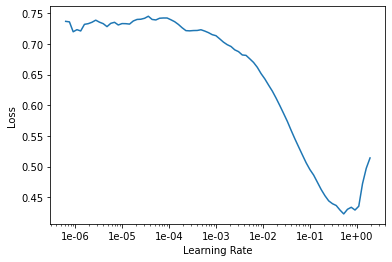

In [104]:
lr_find(learner)
learner.recorder.plot()

In [105]:
EPOCHS = 3
LEARNING_RATE = 1e-02

learner.fit(epochs=EPOCHS, lr=LEARNING_RATE)

epoch,train_loss,valid_loss,accuracy,time
0,0.643330,0.644389,0.665000,00:00
1,0.449451,0.511910,0.780000,00:00
2,0.285892,0.438482,0.820000,00:00


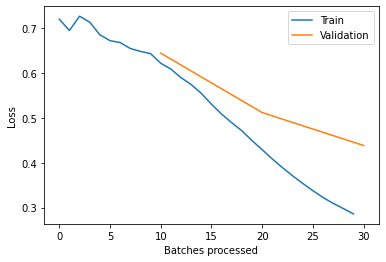

In [106]:
learner.recorder.plot_losses()

# Prediction Time

In [107]:
row = train.iloc[0]
row

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [109]:
learner.predict(row)

(Category 0, tensor(0), tensor([0.8646, 0.1354]))